In [ ]:
pip install tensorflow

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


C:\Users\bambi\OneDrive\Documents\ITSS 4381 - Fall 2024\Anaconda\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8755 - loss: 0.4345
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9656 - loss: 0.1125
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9767 - loss: 0.0735
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9833 - loss: 0.0524
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9883 - loss: 0.0371
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0321
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9915 - loss: 0.0245
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9931 - loss: 0.0201
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9944 - loss: 0.0164
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9941 - loss: 0.0170
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9751 - loss: 0.1018
Test accuracy:  0.98
1/1 ━━━━━━━━━━━━━━━━━━

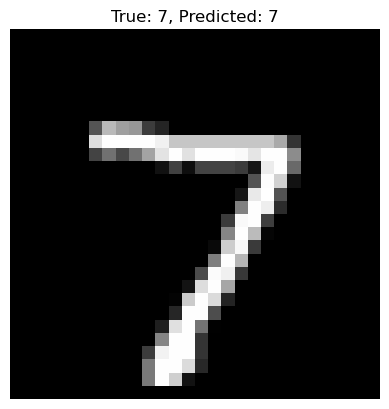

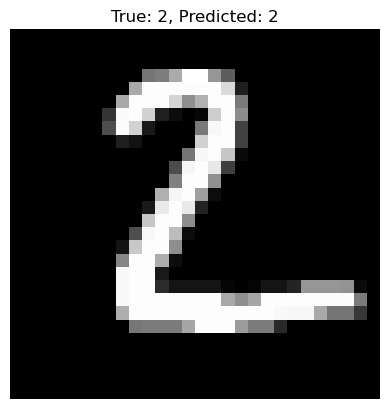

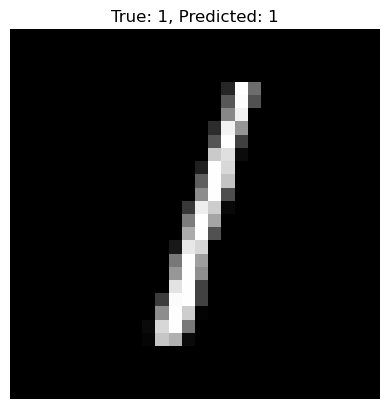

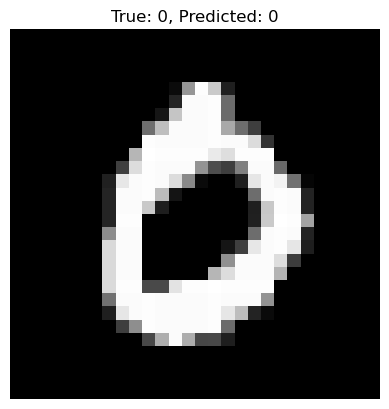

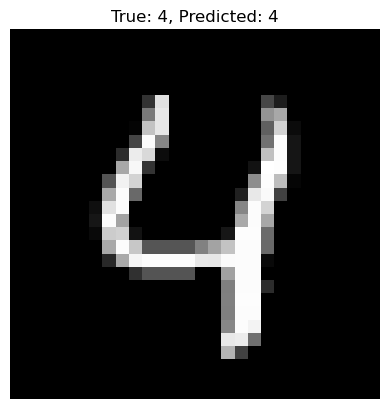

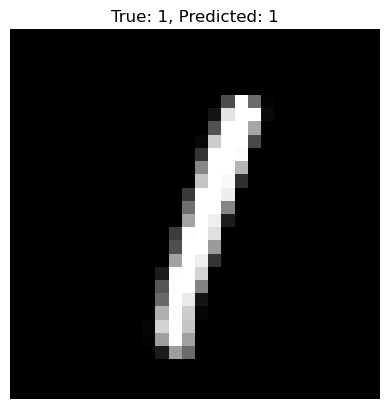

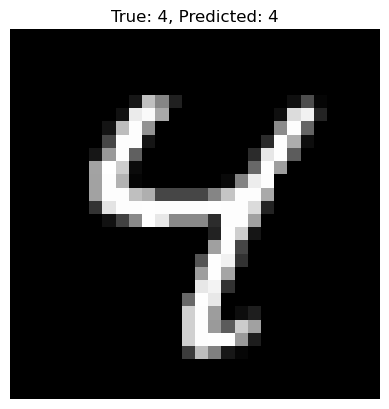

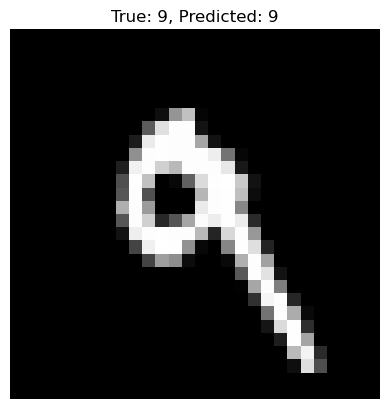

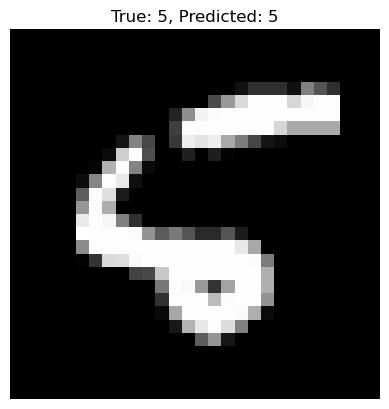

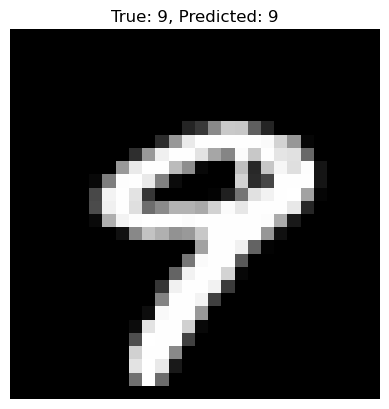

In [21]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

#Load MNIST Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Normalize Data
X_train = X_train / 255.0
X_test = X_test / 255.0

#Flatten the images
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)

#One-hot encode the labels
y_train_onehot = to_categorical(y_train, num_classes=10)
y_test_onehot = to_categorical(y_test, num_classes=10)

#Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model
model.fit(X_train_flattened, y_train_onehot, epochs=10, batch_size=32)

#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flattened, y_test_onehot)
print(f"Test accuracy: {test_accuracy: .2f}")

#Predict values and visualize results
predictions = model.predict(X_test_flattened[:10])
predicted_labels = np.argmax(predictions, axis=1)

for i in range(10):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

